In [1]:
import pandas as pd
import numpy as np
import os
import time
import cv2
import matplotlib.pyplot as plt

In [2]:
# fontsize = 50

# # From https://www.google.com/get/noto/
# !wget -q --show-progress https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip
# !unzip -p NotoSansCJKjp-hinted.zip NotoSansCJKjp-Regular.otf > NotoSansCJKjp-Regular.otf
# !rm NotoSansCJKjp-hinted.zip

# font = ImageFont.truetype('./NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')

In [3]:
FOLDER = '../../data_handson/kuzushiji/'
IMAGES = FOLDER + 'train_images/'
print(os.listdir(FOLDER))

['.DS_Store', 'unicode_translation.csv', 'image', 'train.csv', 'train_images', 'sample_submission.csv']


In [8]:
df_train = pd.read_csv(FOLDER + 'train.csv')
df_sub = pd.read_csv(FOLDER + 'sample_submission.csv')
unicode_map = {codepoint: char for codepoint, char in pd.read_csv(FOLDER + 'unicode_translation.csv').values}

In [9]:
df_sub_idx = df_sub.set_index("image_id")
df_train_idx = df_train.set_index("image_id")
idx_train = df_train['image_id']

In [10]:
df_train_idx.loc[idx_train[0]]

labels    U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
Name: 100241706_00004_2, dtype: object

In [11]:
def label_reader(label):
    try:
        code_arr = np.array(label['labels'].split(' ')).reshape(-1, 5)
    except:
        return
    return code_arr

In [13]:
label_reader(df_train_idx.loc[idx_train[0]])[0]

array(['U+306F', '1231', '3465', '133', '53'], dtype='<U6')

In [7]:
df_char_train = pd.DataFrame()
start = time.time()
for idx in idx_train[:100]:
    code = df_train_idx.loc[idx]
    try:
        code_arr = np.array(code['labels'].split(' ')).reshape(-1, 5)
    except:
        continue
    df_char = pd.DataFrame(code_arr, columns=['unicode', 'x', 'y', 'w', 'h'])
    df_char['image_id'] = idx
    df_char_train = pd.concat([df_char_train, df_char], axis=0)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:0.2516489028930664[sec]


---------- U+306F  :  は ----------
---------- 100241706_00004_2 ----------


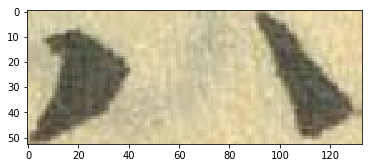

---------- 100241706_00005_1 ----------


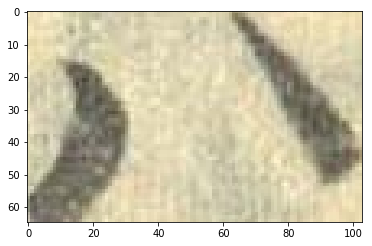

---------- 100241706_00005_2 ----------


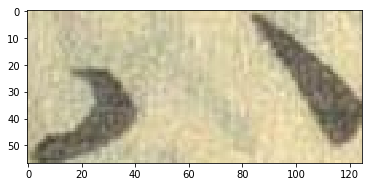

In [12]:
unicode_arr = df_char_train['unicode'].unique()
unicode = unicode_arr[0]

print('-'*10, unicode, ' : ',  unicode_map[unicode], '-'*10)

df_code_char0 = df_char_train.query('unicode == "{}"'.format(unicode))
images_char0 = df_code_char0['image_id'].unique()

cnt = 0
for n in range(3):
    fname = images_char0[n]
    print('-'*10, fname, '-'*10)

    image_path = IMAGES + fname + '.jpg'
    im_original = cv2.imread(image_path)
    im_original = cv2.cvtColor(im_original, cv2.COLOR_BGR2RGB)
    positions = df_code_char0.query('image_id == "{}"'.format(fname))[['x', 'y', 'w', 'h']].values.astype('int')

    for pos in positions:
        x, y, w, h = pos
        im = im_original[y:y+h, x:x+w]
        plt.imshow(im)
        
#         cv2.imwrite("{}_{}.jpg".format(unicode, cnt), im)
#         cnt += 1
        
        plt.show()

In [10]:
# np.random.seed(1337)

# for i in range(10):
#     img, labels = df_train.values[i]
#     viz = visualize_training_data(FOLDER + '/train_images/{}.jpg'.format(img), labels)
    
#     plt.figure(figsize=(15, 15))
#     plt.title(img)
#     plt.imshow(viz, interpolation='lanczos')
#     plt.show()